In [5]:
from typing import Optional, Tuple
from grl.utils.graphing_utils import parse_run_results, graph_df_and_save_figure

graph_title = "Goofspiel"
xlim: Optional[Tuple[float, float]] = (0, 1.33e7)
ylim: Optional[Tuple[float, float]] = None
use_approx_exploitability = True

In [6]:
# All keys are expected to be in the format "<algorithm name> <seed number>".

non_psro_runs = {
    "PPO Self-Play 1": "/home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.39PM_Aug-11-2022yt_7yryv/goofspiel_ppo_discrete_action_04.03.32PM_Aug-14-2022.json",
    "PPO Self-Play 2": "/home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.57PM_Aug-11-2022ihv_unmg/goofspiel_ppo_discrete_action_04.10.27PM_Aug-14-2022.json",
    "PPO Self-Play 3": "/home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.53.09PM_Aug-11-20226z8usbk0/goofspiel_ppo_discrete_action_04.11.47PM_Aug-14-2022.json",

}

psro_runs = {
    "APSRO 1": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.35.00PM_Jan-18-2022/psro_approx_stats_goofspiel_psro_dqn_08.35.00PM_Jan-18-2022.json",
    "APSRO 2": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.35.47PM_Jan-18-2022/psro_approx_stats_goofspiel_psro_dqn_08.35.47PM_Jan-18-2022.json",
    "APSRO 3": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.36.03PM_Jan-18-2022/psro_approx_stats_goofspiel_psro_dqn_08.36.03PM_Jan-18-2022.json",

    "PSRO 1": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.44.01PM_Jan-18-2022/approx_exploitability_stats.json",
    "PSRO 2": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.45.08PM_Jan-18-2022/approx_exploitability_stats.json",
    "PSRO 3": "/home/jblanier/git/grl/grl/data/goofspiel_psro_dqn/manager_08.46.03PM_Jan-18-2022/approx_exploitability_stats.json",

}


In [7]:
def resolve_missing_file(file_path: str) -> str:
    from grl.utils.common import assets_dir
    import os

    if not os.path.exists(file_path):
        file_relative_data_path = file_path.replace("/jb/", "/jblanier/").replace("/home/jblanier/git/grl/grl/data/", "")
        alternate_path = os.path.join(assets_dir(), "archived_data", file_relative_data_path)
        print(f"using alternate_path: {alternate_path}")
        return alternate_path
    return file_path


df = parse_run_results(non_psro_run_dict=non_psro_runs,
                       psro_run_dict=psro_runs,
                       resolve_missing_file_before_read_callback=resolve_missing_file,
                       parse_approximate_exploitability=use_approx_exploitability)

parsing /home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.39PM_Aug-11-2022yt_7yryv/goofspiel_ppo_discrete_action_04.03.32PM_Aug-14-2022.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.39PM_Aug-11-2022yt_7yryv/goofspiel_ppo_discrete_action_04.03.32PM_Aug-14-2022.json
parsing /home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.57PM_Aug-11-2022ihv_unmg/goofspiel_ppo_discrete_action_04.10.27PM_Aug-14-2022.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.52.57PM_Aug-11-2022ihv_unmg/goofspiel_ppo_discrete_action_04.10.27PM_Aug-14-2022.json
parsing /home/jblanier/git/grl/grl/data/self_play_goofspiel_ppo_discrete_action/goofspiel_ppo_discrete_action_sparse_09.

/home/jb/git/sp-psro/grl/utils/graphing_utils.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_experiment["quantized_episodes"] = _df_experiment["episodes"]
/home/jb/git/sp-psro/grl/utils/graphing_utils.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_experiment["quantized_episodes"] = [interval.mid for interval in pd.qcut(_df_experiment["episodes"],
/home/jb/git/sp-psro/grl/utils/graphing_utils.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

(0.0, 13300000.0, -0.09812, 1.04412)
saving to Goofspiel.png


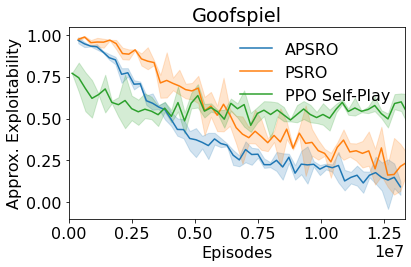

In [8]:
graph_df_and_save_figure(
    non_psro_run_dict=non_psro_runs,
    psro_run_dict=psro_runs,
    df=df,
    title=graph_title,
    xlim=xlim,
    ylim=ylim,
    use_approx_exploitability=use_approx_exploitability)
